# **Car Evaluation Dataset**
<br>

##Importing libraries
<br>

In [ ]:
from google.colab import files                          # for uploading dataset
import pandas as pd                                     
import io                                               # for uploading dataset  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split    # for splitting into training and test data
import numpy as np
!pip install category_encoders
import category_encoders as ce                          # as we use categorical data
from imblearn.over_sampling import SMOTE                # for equal number of samples of each class
from sklearn import tree              
import graphviz                                         # for drawing decision tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

<br></br>
##Loading the dataset
<br>

In [ ]:
upl = files.upload()

Saving car_evaluation.csv to car_evaluation (1).csv


In [ ]:
column_names = ['cost', 'maintenance', 'no_of_doors', 'seating_capacity', 'boot_space', 'safety', 'customer_reaction']

data = pd.read_csv(io.BytesIO(upl['car_evaluation.csv']),names = column_names)

<br></br>
##Data Description and Visualization
<br>

In [ ]:
data.head()

,cost,maintenance,no_of_doors,seating_capacity,boot_space,safety,customer_reaction
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
data.describe()

,cost,maintenance,no_of_doors,seating_capacity,boot_space,safety,customer_reaction
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,4,more,big,high,unacc
freq,432,432,432,576,576,576,1210


In [ ]:
for col in data.columns:
    print(data[col].value_counts())

high     432
low      432
vhigh    432
med      432
Name: cost, dtype: int64
high     432
low      432
vhigh    432
med      432
Name: maintenance, dtype: int64
4        432
3        432
5more    432
2        432
Name: no_of_doors, dtype: int64
more    576
4       576
2       576
Name: seating_capacity, dtype: int64
big      576
small    576
med      576
Name: boot_space, dtype: int64
high    576
low     576
med     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: customer_reaction, dtype: int64


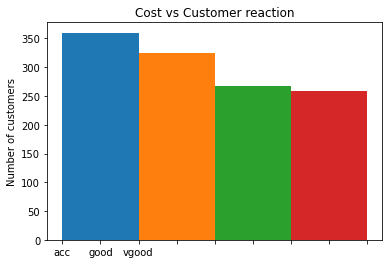

In [ ]:
z = []
t = ['vhigh','high','med','low']


for i in t:
  y1 = data.loc[(data['cost']== i) & (data['customer_reaction']=='unacc')].shape[0]
  y2 = data.loc[(data['cost']== i) & (data['customer_reaction']=='acc')].shape[0]
  y3 = data.loc[(data['cost']== i) & (data['customer_reaction']=='good')].shape[0]
  y4 = data.loc[(data['cost']== i) & (data['customer_reaction']=='vgood')].shape[0]
  z.append([y1,y2,y3,y4])


labels = ['unacc','acc','good','vgood']
  
width = 0.4  

fig, ax = plt.subplots()

rects1 = ax.bar(0, z[0], width, label= labels[0])
rects2 = ax.bar(0.4, z[1], width, label= labels[1])
rects1 = ax.bar(0.8, z[2], width, label= labels[2])
rects2 = ax.bar(1.2, z[3], width, label= labels[3])


ax.set_ylabel('Number of customers')
ax.set_title('Cost vs Customer reaction')
ax.set_xticklabels(labels)

plt.show()

<br></br>
##Splitting data into testing and training set
<br>

In [ ]:
x = data.drop(['customer_reaction'],axis=1)
y = data['customer_reaction']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,train_size = 0.8,shuffle = True)

In [ ]:
mapping = [{'col':'cost', 'mapping':{'low':0, 'med':1, 'high':2, 'vhigh':3}},
          {'col':'maintenance', 'mapping':{'low':0, 'med':1, 'high':2, 'vhigh':3}},
          {'col':'no_of_doors', 'mapping':{'2':0, '3':1, '4':2, '5more':3}},
          {'col':'seating_capacity', 'mapping':{'2':0, '4':1, 'more':2}},
          {'col':'boot_space', 'mapping':{'small':0, 'med':1, 'big':2}},
          {'col':'safety', 'mapping':{'low':0, 'med':1, 'high':2}}]


encoder = ce.OrdinalEncoder(mapping = mapping)



In [ ]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
np.unique(Y_train,return_counts=True)  #before

(array(['acc', 'good', 'unacc', 'vgood'], dtype=object),
 array([296,  56, 980,  50]))

In [ ]:
sm = SMOTE(random_state = 42)
           
X_train, Y_train = sm.fit_sample(X_train, Y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
np.unique(Y_train,return_counts=True)

(array(['acc', 'good', 'unacc', 'vgood'], dtype=object),
 array([980, 980, 980, 980]))

<br></br>
##DECISION TREE
<br>

### Using gini index

In [ ]:
training_loss = []
test_loss = []
test_accuracy = []
train_accuracy = []


def tree_scores(i):
    dtc1 = DecisionTreeClassifier(criterion='gini', max_depth=i)
    
    dtc1.fit(X_train, Y_train)
    y_pred_train_gini = dtc1.predict_proba(X_train)
    y_pred_test_gini = dtc1.predict_proba(X_test)
    
    training_loss.append(log_loss(Y_train, y_pred_train_gini))
    test_loss.append(log_loss(Y_test, y_pred_test_gini))

    train_accuracy.append(dtc1.score(X_train, Y_train))
    test_accuracy.append(dtc1.score(X_test,Y_test))
     
        
for i in range(1,16):
    tree_scores(i)

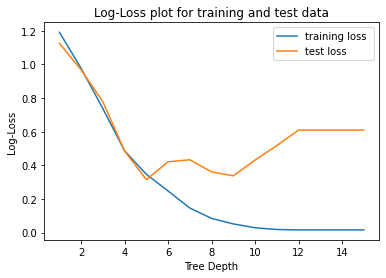

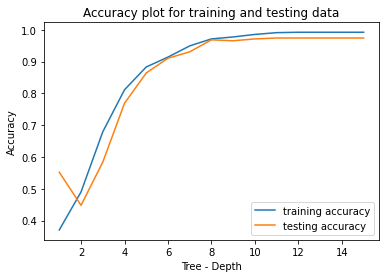

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

plt.plot(x, training_loss, label = "training loss ")
plt.plot(x, test_loss, label = "test loss ")

plt.xlabel('Tree Depth')
plt.ylabel('Log-Loss')

plt.title('Log-Loss plot for training and test data')

plt.legend()
plt.show()




plt.plot(x, train_accuracy, label = 'training accuracy')
plt.plot(x,test_accuracy, label = 'testing accuracy')

plt.xlabel('Tree - Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy plot for training and testing data')
plt.legend()

plt.show()

Printing the best accuracy of the model

In [ ]:
dtc1 = DecisionTreeClassifier(criterion='entropy', max_depth= test_accuracy.index(max(test_accuracy))+1)    
dtc1.fit(X_train, Y_train)
print('Depth of tree giving maximum test accuracy - ', test_accuracy.index(max(test_accuracy))+1)
print('Training accuracy - ',dtc1.score(X_train,Y_train))
print('Testing accuracy - ',dtc1.score(X_test,Y_test))

Depth of tree giving maximum test accuracy -  11
Training accuracy -  0.9905612244897959
Testing accuracy -  0.9739884393063584


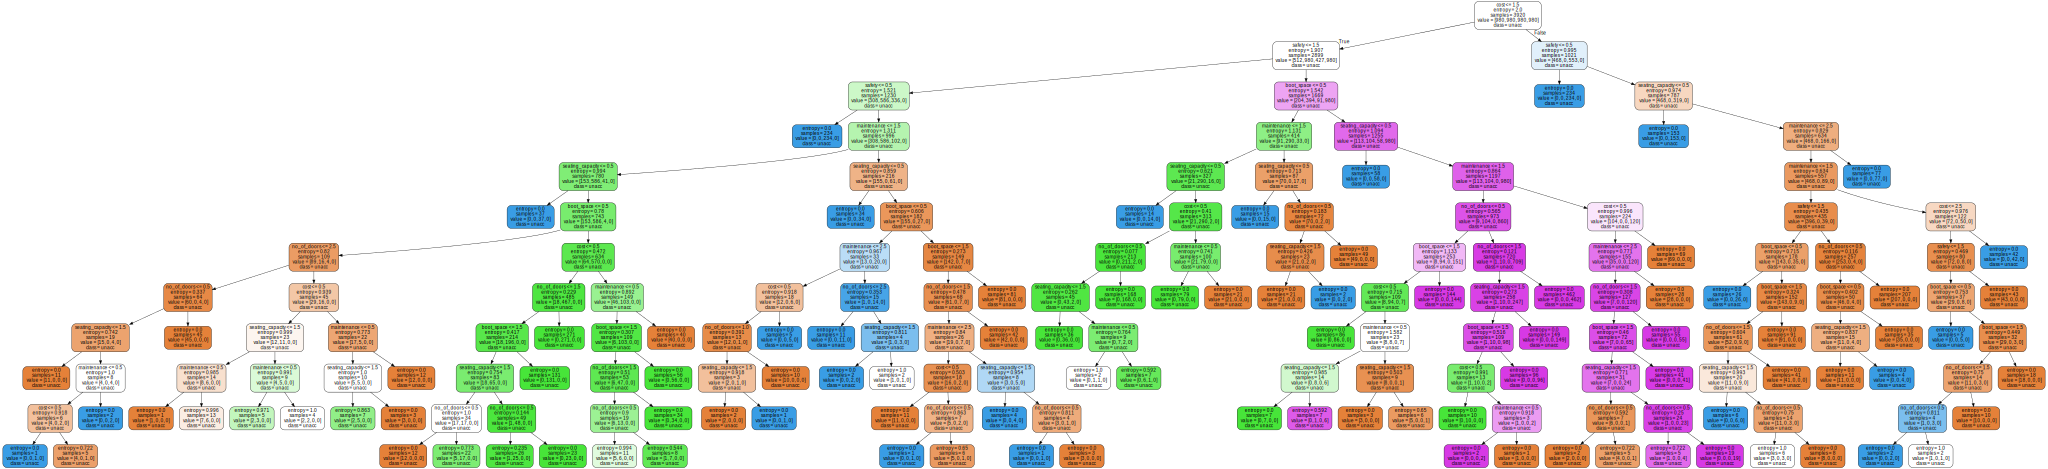

In [ ]:
graphviz.Source(tree.export_graphviz(dtc1,feature_names = column_names[:6],class_names=Y_train,rounded = True, filled = True))

###Using entropy

In [ ]:
training_loss = []
test_loss = []
test_accuracy = []
train_accuracy = []


def tree_scores(i):
    dtc2 = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    
    dtc2.fit(X_train, Y_train)
    y_pred_train = dtc2.predict_proba(X_train)
    y_pred_test = dtc2.predict_proba(X_test)
    
    training_loss.append(log_loss(Y_train, y_pred_train))
    test_loss.append(log_loss(Y_test, y_pred_test))

    train_accuracy.append(dtc2.score(X_train, Y_train))
    test_accuracy.append(dtc2.score(X_test,Y_test))
     
        
for i in range(1,16):
    tree_scores(i)

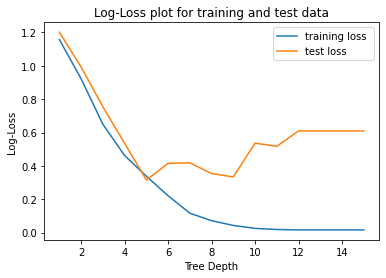

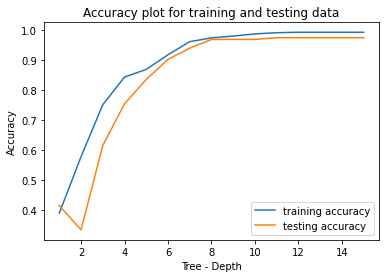

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

plt.plot(x, training_loss, label = "training loss ")
plt.plot(x, test_loss, label = "test loss ")

plt.xlabel('Tree Depth')
plt.ylabel('Log-Loss')

plt.title('Log-Loss plot for training and test data')

plt.legend()
plt.show()


plt.plot(x, train_accuracy, label = 'training accuracy')
plt.plot(x,test_accuracy, label = 'testing accuracy')

plt.xlabel('Tree - Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy plot for training and testing data')
plt.legend()

plt.show()


Printing the best accuracy of the model

In [ ]:
dtc2 = DecisionTreeClassifier(criterion='entropy', max_depth= test_accuracy.index(max(test_accuracy))+1)    
dtc2.fit(X_train, Y_train)
print('Depth of tree giving maximum test accuracy - ', test_accuracy.index(max(test_accuracy))+1)
print('Training accuracy - ',dtc2.score(X_train,Y_train))
print('Testing accuracy - ',dtc2.score(X_test,Y_test))

Depth of tree giving maximum test accuracy -  11
Training accuracy -  0.9905612244897959
Testing accuracy -  0.9739884393063584


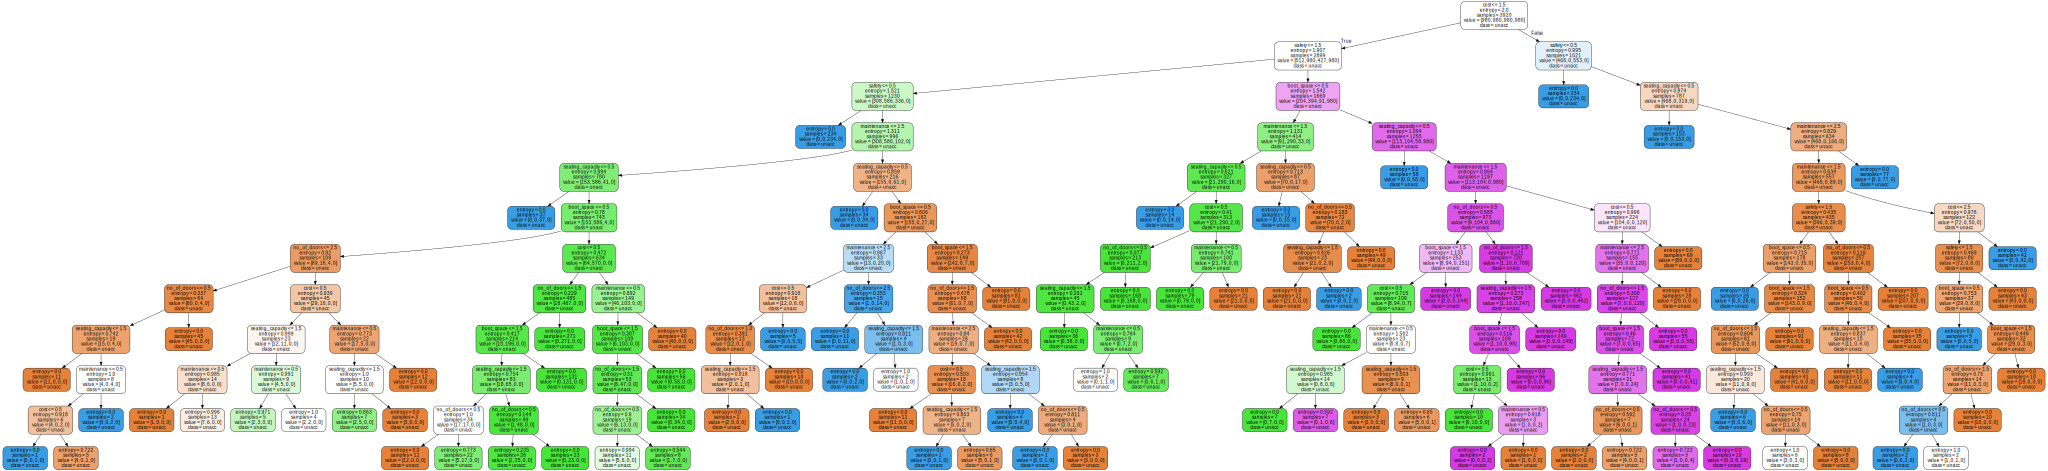

In [ ]:
graphviz.Source(tree.export_graphviz(dtc2,feature_names = column_names[:6],class_names=Y_train,rounded = True, filled = True))

<br></br>
##NAIVE BAYES
<br>

In [ ]:
nb = CategoricalNB()
nb.fit(X_train, Y_train)

print('Training Score - ',nb.score(X_train, Y_train))
print('Testing Score - ',nb.score(X_test,Y_test))
print('Training Loss - ',log_loss(Y_train,nb.predict_proba(X_train)))
print('Testing Loss - ',log_loss(Y_test,nb.predict_proba(X_test)))

Training Score -  0.8938775510204081
Testing Score -  0.8294797687861272
Training Loss -  0.35265324496360545
Testing Loss -  0.3302038837860592


In [ ]:
cf_matrix = confusion_matrix(Y_test,nb.predict(X_test))
print(cf_matrix)

[[ 77   7   0   4]
 [  0  12   0   1]
 [ 46   1 183   0]
 [  0   0   0  15]]


[Text(0, 0.5, 'unacc'),
 Text(0, 1.5, 'vgood'),
 Text(0, 2.5, 'acc'),
 Text(0, 3.5, 'good')]

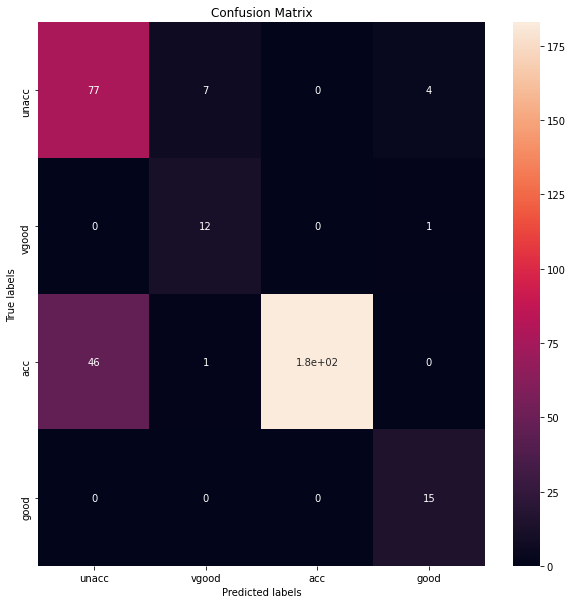

In [ ]:
plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cf_matrix,annot = True, ax = ax)  

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(Y_test.unique())
ax.yaxis.set_ticklabels(Y_test.unique())

<br></br>
##KNN
<br>

In [ ]:
training_loss = []
test_loss = []
test_accuracy = []
train_accuracy = []

def KNN_scores(i):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    
    y_pred_train = knn.predict_proba(X_train)
    y_pred_test = knn.predict_proba(X_test)
    
    training_loss.append(log_loss(Y_train, y_pred_train))
    test_loss.append(log_loss(Y_test, y_pred_test))
     
    train_accuracy.append(knn.score(X_train, Y_train))
    test_accuracy.append(knn.score(X_test,Y_test)) 
        
for i in range(1,16):
    KNN_scores(i)

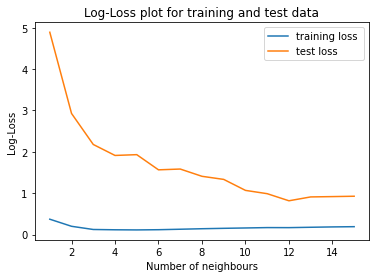

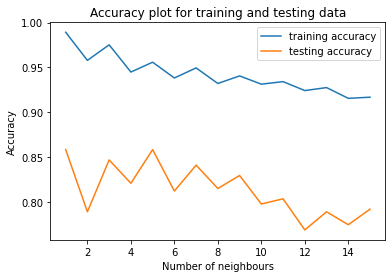

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

plt.plot(x, training_loss, label = "training loss ")
plt.plot(x, test_loss, label = "test loss ")

plt.xlabel('Number of neighbours')
plt.ylabel('Log-Loss')

plt.title('Log-Loss plot for training and test data')

plt.legend()

plt.show()


plt.plot(x, train_accuracy, label = 'training accuracy')
plt.plot(x,test_accuracy, label = 'testing accuracy')

plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.title('Accuracy plot for training and testing data')
plt.legend()

plt.show()


Printing the best accuracy of the model 

In [ ]:
knn = KNeighborsClassifier(n_neighbors= test_accuracy.index(max(test_accuracy))+1)
knn.fit(X_train,Y_train)
knn.predict(X_test)
print("Number of neighbours chosen for maximum testing accuracy - ",test_accuracy.index(max(test_accuracy))+1)
print("Training accuracy - ",knn.score(X_train, Y_train))
print("Testing accuracy - ",knn.score(X_test,Y_test))

Number of neighbours chosen for maximum testing accuracy -  1
Training accuracy -  0.9892857142857143
Testing accuracy -  0.8583815028901735
